In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
np.random.seed(167)
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object and col_type.name != 'category' and 'datetime' not in col_type.name:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif 'datetime' not in col_type.name:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

## 1. Load data

### 1.1. `train_v2.csv` dataset

In [3]:
train = pd.read_csv('train_v2.csv')

In [4]:
train.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 2 columns):
msno        970960 non-null object
is_churn    970960 non-null int64
dtypes: int64(1), object(1)
memory usage: 14.8+ MB


### 1.2. `sample_submission_v2.csv` dataset

In [4]:
test = pd.read_csv('sample_submission_v2.csv')

In [7]:
test.head()

,msno,is_churn
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907471 entries, 0 to 907470
Data columns (total 2 columns):
msno        907471 non-null object
is_churn    907471 non-null int64
dtypes: int64(1), object(1)
memory usage: 13.8+ MB


In [5]:
# To do EDA, we consider only msno of training dataset
msno_train = train['msno'].tolist()

In [6]:
msno_all = train['msno'].tolist() + test['msno'].tolist()

### 1.3. `transactions.csv` and `transactions_v2.csv` dataset

In [7]:
transactions = pd.concat([pd.read_csv('transactions.csv'), pd.read_csv('transactions_v2.csv')], axis = 0)

In [8]:
transactions = reduce_mem_usage(transactions)

Memory usage of dataframe is 1753.14 MB
Memory usage after optimization is: 734.02 MB
Decreased by 58.1%


In [9]:
transactions = transactions.loc[transactions['msno'].isin(msno_all)] #msno_all 

In [15]:
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0
5,KN7I82kjY0Tn76Ny95ncqBUVbO7b8AXrOPqZutKpxIM=,21,30,149,149,1,20150930,20151107,0
6,m5ptKif9BjdUghHXXomSezy5ohJiHm85PE13f/3kQaw=,39,30,149,149,1,20150930,20151128,0
8,LUPRfoE2r3WwVWhYO/TqQhjrL/qP6CO+/ORUlr7yNc0=,39,30,149,149,1,20150930,20151222,0


In [16]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17133228 entries, 1 to 1431007
Data columns (total 9 columns):
msno                      category
payment_method_id         int8
payment_plan_days         int16
plan_list_price           int16
actual_amount_paid        int16
is_auto_renew             int8
transaction_date          int32
membership_expire_date    int32
is_cancel                 int8
dtypes: category(1), int16(3), int32(2), int8(3)
memory usage: 572.4 MB


### 1.4. `members_v3.csv` dataset

In [10]:
members = pd.read_csv('members_v3.csv')

In [11]:
members = members.loc[members['msno'].isin(msno_all)] #msno_all

In [19]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915
5,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,4,30,male,9,20110916
9,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,13,63,male,9,20110918
10,OoDwiKZM+ZGr9P3fRivavgOtglTEaNfWJO4KaJcTTts=,1,0,NaN,7,20110918


In [20]:
members.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956565 entries, 1 to 6769469
Data columns (total 6 columns):
msno                      956565 non-null object
city                      956565 non-null int64
bd                        956565 non-null int64
gender                    435526 non-null object
registered_via            956565 non-null int64
registration_init_time    956565 non-null int64
dtypes: int64(4), object(2)
memory usage: 51.1+ MB


### 1.5. `user_logs_v2.csv` dataset

In [20]:
#reader = pd.read_csv('user_logs.csv', chunksize=1000000)
#user_data = pd.DataFrame()
#for chunk in tqdm(reader):
#    chunk = chunk.loc[chunk['msno'].isin(msno)]
#    user_data = pd.concat([user_data, chunk])

In [21]:
user_logs = pd.read_csv('user_logs_v2.csv')

In [22]:
user_logs = reduce_mem_usage(user_logs)

Memory usage of dataframe is 1263.18 MB
Memory usage after optimization is: 504.57 MB
Decreased by 60.1%


In [23]:
user_logs = user_logs.loc[user_logs['msno'].isin(msno_train)] #msno_all 

In [24]:
user_logs.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.272949
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.698975
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337891
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558594
5,qR/ndQ5B+1cY+c9ihwLoiz+RFiqEnGyQKo32ZErEVKo=,20170331,3,0,0,0,39,41,9786.841797


In [25]:
user_logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13532944 entries, 0 to 18396361
Data columns (total 9 columns):
msno          category
date          int32
num_25        int16
num_50        int16
num_75        int16
num_985       int16
num_100       int32
num_unq       int16
total_secs    float32
dtypes: category(1), float32(1), int16(5), int32(2)
memory usage: 487.2 MB


## 2. Exploratory data analysis (EDA)

### 2.1. `train` dataset

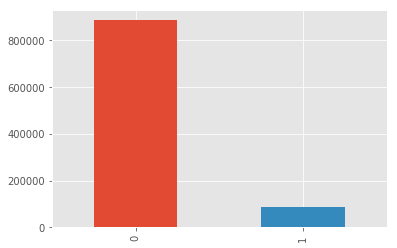

In [26]:
train['is_churn'].value_counts().plot.bar()

In [27]:
train['is_churn'].value_counts()*100/train.shape[0]

0    91.005809
1     8.994191
Name: is_churn, dtype: float64

In [12]:
train_members = pd.merge(train, members, how = 'left', on = 'msno')

In [13]:
test_members = pd.merge(test, members, how = 'left', on = 'msno')

In [14]:
del members

In [23]:
train_members.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Data columns (total 7 columns):
msno                      970960 non-null object
is_churn                  970960 non-null int64
city                      860967 non-null float64
bd                        860967 non-null float64
gender                    388905 non-null object
registered_via            860967 non-null float64
registration_init_time    860967 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 59.3+ MB


In [24]:
test_members.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907471 entries, 0 to 907470
Data columns (total 7 columns):
msno                      907471 non-null object
is_churn                  907471 non-null int64
city                      795090 non-null float64
bd                        795090 non-null float64
gender                    318249 non-null object
registered_via            795090 non-null float64
registration_init_time    795090 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 55.4+ MB


In [17]:
train_members['city'] = train_members['city'].fillna(0)

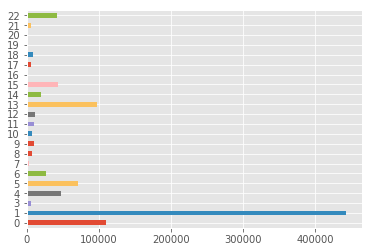

In [26]:
train_members['city'].astype(int).value_counts().sort_index().plot.barh()

D:\Code\Anaconda3\envs\THANGHOANG\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


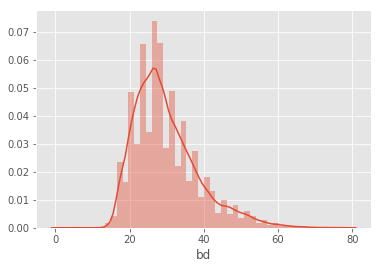

In [34]:
sns.distplot(train_members.loc[((train_members['bd'] < 80) & (train_members['bd'] > 0)), 'bd'])

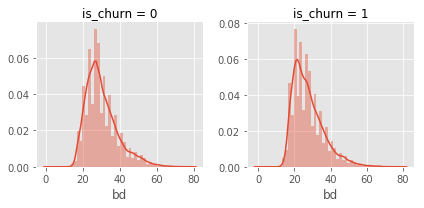

In [35]:
g = sns.FacetGrid(train_members.loc[((train_members['bd'] < 80) & (train_members['bd'] > 0))], col = 'is_churn', sharex = False, sharey = False)
g.map(sns.distplot, 'bd')

In [36]:
train_members.loc[((train_members['bd'] <= 100) & (train_members['bd'] >= 18))].shape[0]

376919

In [15]:
# Consider keep or drop `bd`
train_members = train_members.drop('bd', axis = 1)

In [16]:
train_members['gender'] = train_members['gender'].fillna('unknown')

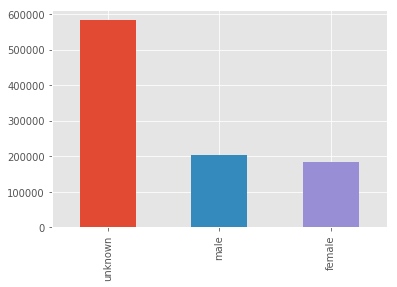

In [29]:
train_members['gender'].value_counts().plot.bar()

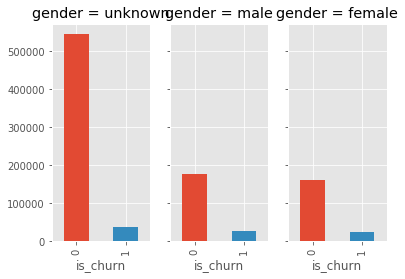

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, sharex = False)
train_members.groupby(['gender', 'is_churn']).size()['unknown'].plot(ax = ax1, kind = 'bar', title = 'gender = unknown')
train_members.groupby(['gender', 'is_churn']).size()['male'].plot(ax = ax2, kind = 'bar', title = 'gender = male')
train_members.groupby(['gender', 'is_churn']).size()['female'].plot(ax = ax3, kind = 'bar', title = 'gender = female')

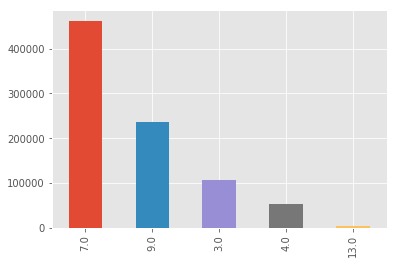

In [31]:
train_members['registered_via'].value_counts().plot.bar()

In [32]:
test_members['registered_via'].value_counts()

7.0     475062
9.0     182871
3.0      86021
4.0      47686
13.0      3450
Name: registered_via, dtype: int64

In [18]:
train_members['registered_via'] = train_members['registered_via'].fillna(0)

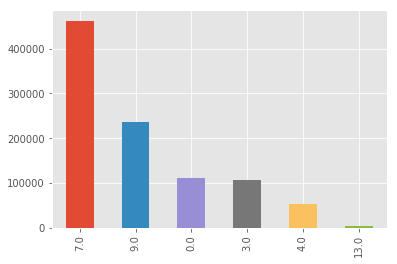

In [44]:
train_members['registered_via'].value_counts().plot.bar()

In [19]:
nb_null = train_members.loc[train_members['registration_init_time'].isnull()].shape[0]
imputer = np.random.permutation(train_members.loc[~train_members['registration_init_time'].isnull(), 'registration_init_time'])[:nb_null]
train_members.loc[train_members['registration_init_time'].isnull(), 'registration_init_time'] = imputer

In [35]:
train_members.head()

,msno,is_churn,city,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,male,3.0,20131223.0
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,male,3.0,20131223.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,male,3.0,20131227.0
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,unknown,7.0,20140109.0
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,female,7.0,20140125.0


In [20]:
col = train_members.select_dtypes(include=['int64', 'float64']).columns
train_members[col] = train_members[col].astype(int)

In [21]:
train_members.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Data columns (total 6 columns):
msno                      970960 non-null object
is_churn                  970960 non-null int32
city                      970960 non-null int32
gender                    970960 non-null object
registered_via            970960 non-null int32
registration_init_time    970960 non-null int32
dtypes: int32(4), object(2)
memory usage: 37.0+ MB


In [22]:
train_members['registration_init_time'] = pd.to_datetime(train_members['registration_init_time'], format='%Y%m%d')

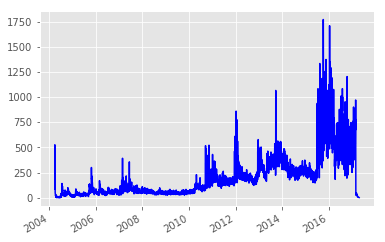

In [50]:
train_members['registration_init_time'].value_counts().sort_index().plot.line(color = 'blue')

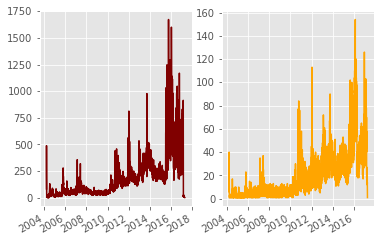

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = False, sharex = False)
train_members.loc[train_members['is_churn'] == 0, 'registration_init_time'].value_counts().sort_index().plot.line(ax = ax1, color = 'maroon')
train_members.loc[train_members['is_churn'] == 1, 'registration_init_time'].value_counts().sort_index().plot.line(ax = ax2, color = 'orange')

In [23]:
train_members['registration_year'] = train_members['registration_init_time'].dt.year
train_members['registration_month'] = train_members['registration_init_time'].dt.month
train_members['registration_dayofweek'] = train_members['registration_init_time'].dt.dayofweek

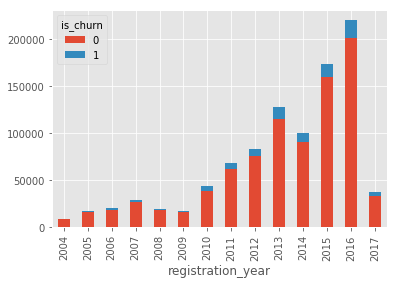

In [40]:
train_members.pivot_table(values='msno', index='registration_year', columns='is_churn', aggfunc=np.count_nonzero).plot.bar(stacked = True)

In [41]:
abc = train_members.pivot_table(values='msno', index='registration_year', columns='is_churn', aggfunc=np.count_nonzero)
abc.apply(lambda x: x*100/abc.sum(axis = 1))

is_churn,0,1
registration_year,,
2004,91.698718,8.301282
2005,93.373426,6.626574
2006,92.119192,7.880808
2007,91.445767,8.554233
2008,90.516333,9.483667
2009,89.682718,10.317282
2010,89.088366,10.911634
2011,91.569984,8.430016
2012,90.886242,9.113758


### 2.2. `transactions` dataset

In [42]:
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0
5,KN7I82kjY0Tn76Ny95ncqBUVbO7b8AXrOPqZutKpxIM=,21,30,149,149,1,20150930,20151107,0
6,m5ptKif9BjdUghHXXomSezy5ohJiHm85PE13f/3kQaw=,39,30,149,149,1,20150930,20151128,0
8,LUPRfoE2r3WwVWhYO/TqQhjrL/qP6CO+/ORUlr7yNc0=,39,30,149,149,1,20150930,20151222,0


In [24]:
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'], format='%Y%m%d')
transactions['membership_expire_date'] = pd.to_datetime(transactions['membership_expire_date'], format='%Y%m%d')

In [44]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17133228 entries, 1 to 1431007
Data columns (total 9 columns):
msno                      category
payment_method_id         int8
payment_plan_days         int16
plan_list_price           int16
actual_amount_paid        int16
is_auto_renew             int8
transaction_date          datetime64[ns]
membership_expire_date    datetime64[ns]
is_cancel                 int8
dtypes: category(1), datetime64[ns](2), int16(3), int8(3)
memory usage: 703.1 MB


In [25]:
transactions = transactions.sort_values(by = ['msno', 'transaction_date'], ascending = [True, True])

### check case 1: is_cancel at the last `membership_expire_date`

In [26]:
train_transactions = transactions.loc[transactions['msno'].isin(msno_train)]

In [27]:
check = train_transactions.groupby('msno')['transaction_date', 'membership_expire_date', 'is_cancel'].nth(-1)

In [28]:
check.shape

(970960, 3)

In [94]:
abcd1 = check.loc[check['is_cancel'] == 1].index.tolist()

In [95]:
xyz = train.loc[train['msno'].isin(abcd1)]

In [31]:
xyz['is_churn'].value_counts()

1    25595
0     4975
Name: is_churn, dtype: int64

### check case 2: max `membership_expire_date` = last `membership_expire_date`

In [34]:
check2 = train_transactions.loc[train_transactions['membership_expire_date'] <= pd.Timestamp('2017-03-31'), ['msno', 'transaction_date', 'membership_expire_date', 'is_cancel']]

In [35]:
check2.head()

,msno,transaction_date,membership_expire_date,is_cancel
1498592,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,2016-11-16,2016-12-15,0
17923235,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,2016-12-15,2017-01-15,0
58566,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,2017-01-15,2017-02-15,0
1914756,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,2017-02-15,2017-03-15,0
7798380,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,2015-01-31,2015-03-19,0


In [37]:
# Take last membership_expire_date <= 31-03-2017
check3 = check2.groupby('msno')['membership_expire_date'].max().dropna()

In [38]:
check3.shape

(970960,)

In [80]:
# max membership_expire_date != last membership_expire_date
check4 = check.loc[check['membership_expire_date'] != check3]

In [84]:
check4.shape

(916951, 3)

In [78]:
# max membership_expire_date = last membership_expire_date
check5 = check.loc[check['membership_expire_date'] == check3]

In [83]:
check5.shape

(54009, 3)

In [82]:
# max membership_expire_date = last membership_expire_date
abcd = check5.index.tolist()
xyz = train.loc[train['msno'].isin(abcd)]
xyz['is_churn'].value_counts()

1    35279
0    18730
Name: is_churn, dtype: int64

In [87]:
# max membership_expire_date = last membership_expire_date and is_cancel == 1
abcd = check5.loc[check5['is_cancel'] == 1].index.tolist()
xyz = train.loc[train['msno'].isin(abcd)]
xyz['is_churn'].value_counts()

1    11424
0     2560
Name: is_churn, dtype: int64

In [96]:
# max membership_expire_date = last membership_expire_date and is_cancel == 0
abcd2 = check5.loc[check5['is_cancel'] == 0].index.tolist()
xyz = train.loc[train['msno'].isin(abcd2)]
xyz['is_churn'].value_counts()

1    23855
0    16170
Name: is_churn, dtype: int64

In [97]:
# max membership_expire_date != last membership_expire_date 
abcd3 = check4.loc[(check4['transaction_date'] < check3.loc[check4.index]) & (check4['is_cancel'] == 0)].index.tolist()
xyz = train.loc[train['msno'].isin(abcd3)]
xyz['is_churn'].value_counts()

0    83445
1    23782
Name: is_churn, dtype: int64

In [98]:
# max membership_expire_date != last membership_expire_date 
abcd4 = check4.loc[(check4['transaction_date'] >= check3.loc[check4.index]) & (check4['is_cancel'] == 0)].index.tolist()
xyz = train.loc[train['msno'].isin(abcd4)]
xyz['is_churn'].value_counts()

0    779040
1     14098
Name: is_churn, dtype: int64

In [99]:
len(abcd1) + len(abcd2) + len(abcd3) + len(abcd4)

970960